<a href="https://colab.research.google.com/github/Jaywestty/Axia-Capstone-Project/blob/main/Fadairo_Juwon_Axia_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **FADAIRO JUWON'S AXIA CAPSTONE PROJECT**
## **PREDICTION OF GLOBAL RESTAURANTS RATING PROJECT**
### **PROJECT INTRODUCTION**
This regression analysis project would be carried out by using the Global restuarant dataset (https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv).


###**PROBLEM STATEMENT**
It is the aim of this project to create a machine learning regression model such as linear regression, decision trees and random forest regression which will predict the aggregate rating of restaurants.

## **WEEK 1 TASK**

- Explore the dataset and identify the number of rows and columns.

- Check for missing values in each column and handle them accordingly.

- Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.
- Calculate statistics for numerical columns.
- Identify top 5 cuisines and cities.

In [1]:
#importing the required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

sns.set_style('whitegrid')

#### Dataset Overview

In [2]:
#load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/axia_class_cohort_7/refs/heads/main/Dataset%20.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#Get information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
#check colums of the dataset

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

#### **Data understanding**

The dataset contains features that would be useful in creating the model.

- Restaurant ID and Restaurant Name are two columns that provide information about each restaurant's name and ID
-  The Country Code, City, Address, Locality, Locality Verbose, Longitude, and Latitude provide specific location and indigenous information about each restaurant.
- Cuisines provides information about each type of cuisine offered in a restaurant
- The range of prices, the average cost for two people, and the currency offer information about the type of money and amount of each dish, are also key features in predicting the target variable.
- Rating color, Rating text, and Votes provide information about each restaurant's rating and are also key features in predicting the target variable.
- The aggregate rating, which is our target variable, is the rating each restaurant receives.

####**Explore the dataset and identify the number of rows and columns.**

In [5]:
#check the shape of the data

df.shape

(9551, 21)

**Observation**
- It can be seen that the dataset has 9551 rows and 21 columns

####**Check for missing values in each column and handle them accordingly.**

In [6]:
#check for missing data

df.isna().sum().sort_values(ascending=False)

,0
Cuisines,9
Restaurant Name,0
Country Code,0
City,0
Restaurant ID,0
Address,0
Locality,0
Longitude,0
Locality Verbose,0
Latitude,0


In [7]:
#Drop the missing values

df.dropna(inplace=True)

**Observation**
- We have just 9 missing values in the cuisine colunmn, this is a very small percentage of missing values, so its best we drop the missing values.

####**Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.**

In [8]:
#Counts of Aggregate Rating

df['Aggregate rating'].value_counts()

,count
Aggregate rating,
0.0,2148
3.2,522
3.1,519
3.4,495
3.3,483
3.5,480
3.0,468
3.6,458
3.7,427


In [9]:
#Count the frequency of each Aggregate rating value within each Rating text category.

df.groupby('Rating text')['Aggregate rating'].value_counts()

Rating text  Aggregate rating
Average      3.2                  522
             3.1                  519
             3.4                  495
             3.3                  483
             3.0                  468
             2.9                  381
             2.8                  315
             2.7                  250
             2.6                  191
             2.5                  110
Excellent    4.5                   95
             4.6                   78
             4.9                   61
             4.7                   41
             4.8                   25
Good         3.5                  480
             3.6                  458
             3.7                  427
             3.8                  399
             3.9                  332
Not rated    0.0                 2148
Poor         2.4                   87
             2.3                   47
             2.2                   27
             2.1                   15
             2.0                    7
             1.9                    2
             1.8                    1
Very Good    4.1                  274
             4.0                  266
             4.2                  221
             4.3                  174
             4.4                  143
Name: count, dtype: int64

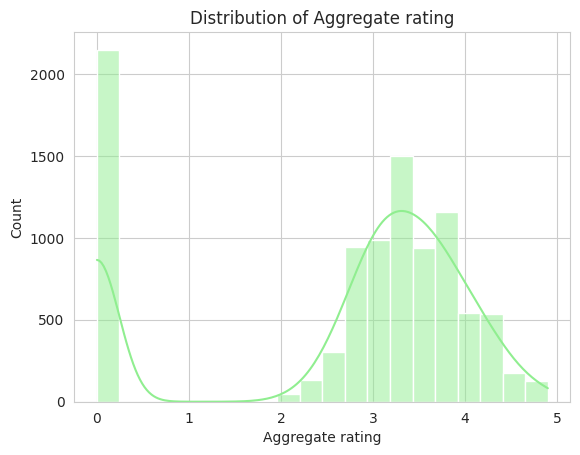

In [10]:
#Histogram of the Aggregate rating column

sns.histplot(df['Aggregate rating'], kde=True, bins=20,color='lightgreen')
plt.title('Distribution of Aggregate rating')
plt.show()

**Observations**

- From the results gotten from the frequency count of the Aggregate rating by the Rating text, it can be seen that 0 appeared 2148 times as Not rated restuarants.
-  From the histogram , it can be deduced that the Aggregate rating is negatively skewed.


####**Calculate statistics for numerical columns.**

In [11]:
#Check for the statistics of the dataset and Transpose

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9542.0,9.043301e+06,8.791967e+06,53.000000,301931.250000,6.002726e+06,1.835260e+07,1.850065e+07
Country Code,9542.0,1.817921e+01,5.645160e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9542.0,6.427500e+01,4.119760e+01,-157.948486,77.081565,7.719203e+01,7.728204e+01,1.748321e+02
Latitude,9542.0,2.584853e+01,1.101009e+01,-41.330428,28.478658,2.857044e+01,2.864271e+01,5.597698e+01
Average Cost for two,9542.0,1.200326e+03,1.612874e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9542.0,1.804968e+00,9.055631e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9542.0,2.665238e+00,1.516588e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9542.0,1.567721e+02,4.302033e+02,0.000000,5.000000,3.100000e+01,1.300000e+02,1.093400e+04


**Observation**
- We can notice outliers in the Average Cost for two column, the 25% is oddly larger than the 50%,75% and max.
- We can also notice outliers in the Votes column, the 25% is also oddly larger than the 50%,75% and max.

####**Identify top 5 cuisines and cities.**

In [12]:
#Top 5 cuisine

top_cuisines = df['Cuisines'].dropna().str.split(', ').explode().value_counts().head(5)
top_cuisines

,count
Cuisines,
North Indian,3960
Chinese,2735
Fast Food,1986
Mughlai,995
Italian,764


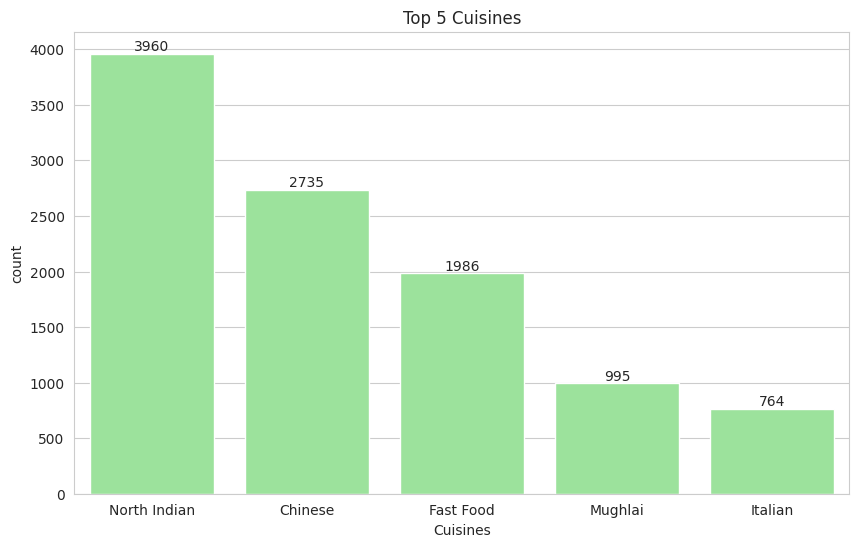

In [13]:
#Visualize the Top5 cuisines
plt.figure(figsize=(10,6))
plot = sns.barplot(top_cuisines, color='lightgreen')
for bars in plot.containers:
    plot.bar_label(bars)
plt.title('Top 5 Cuisines')
plt.show()

In [14]:
# Top 5 cities

df['City'].value_counts().head(5)

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25


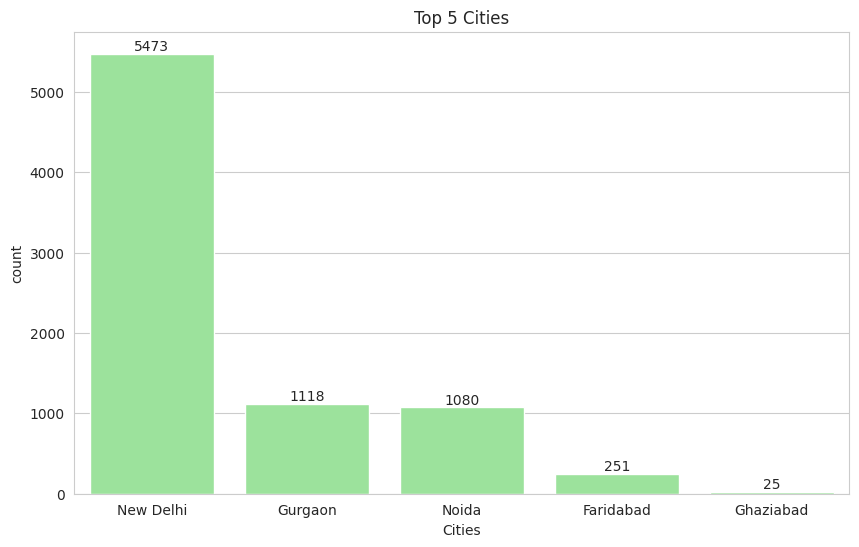

In [15]:
#Visualize the Top5 cities
plt.figure(figsize=(10,6))
plot = sns.countplot(x='City', data=df, order=df['City'].value_counts().index[:5],color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars)
plt.title('Top 5 Cities')
plt.xlabel('Cities')
plt.show()

**Observations**
- The top 5 cuisines are the [North indian(3960)], [Chinese(2735)],[Fast food	(1986)], [Mughlai	(995)], [Italian	(764)]
- The top 5 cities are New Delhi(5473), Gurgaon(1118), Noida cities(1080), faridabad(251), Ghaziabad(25).

## **WEEK 2 TASK**
- Create histograms and boxplots of Aggregate ratings.
- Compare average ratings across cuisines and cities.
- Map restaurant locations using coordinates and correlate with ratings.
- Identify outliers and their effects.
-Determine relationship between votes and ratings.

####**DATA VISUALIZATIONS**


**Create histograms and boxplots of Aggregate ratings.**

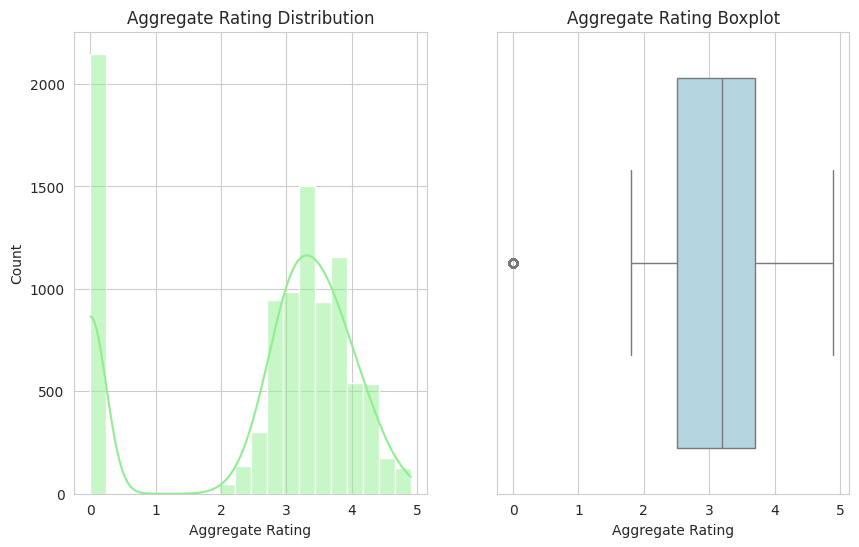

In [16]:
#Histogram
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(df['Aggregate rating'], kde=True, bins=20,color='lightgreen')
plt.title('Aggregate Rating Distribution')
plt.xlabel('Aggregate Rating')

#Boxplot
plt.subplot(1,2,2)
sns.boxplot(x='Aggregate rating', data=df, color='lightblue')
plt.title('Aggregate Rating Boxplot')
plt.xlabel('Aggregate Rating')

plt.show()

####**Compare average ratings across cuisines and cities.**

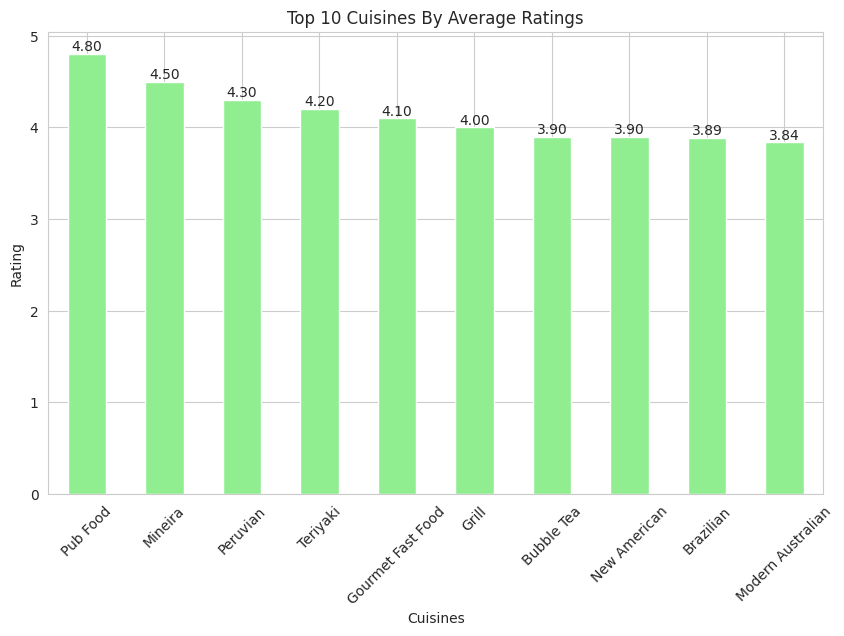

In [17]:
#Compare Average rating across cuisines

#split cuisines
df["Cuisines"] = df["Cuisines"].str.split(", ").explode().reset_index(drop=True)

plt.figure(figsize=(10,6))
plot = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars, fmt='%.2f')
plt.xlabel('Cuisines')
plt.ylabel('Rating')
plt.title('Top 10 Cuisines By Average Ratings')
plt.xticks(rotation=45)
plt.show()

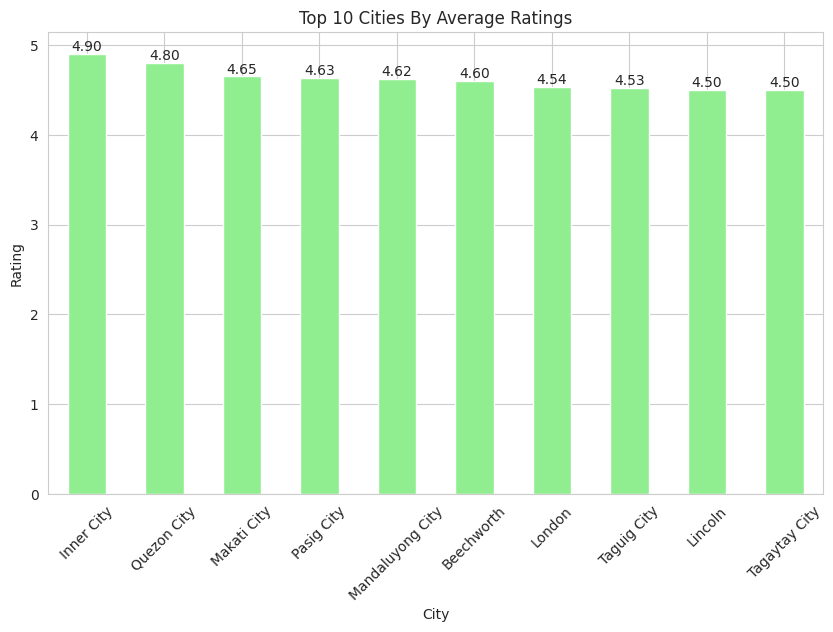

In [18]:
#Compare Average rating across cities


plt.figure(figsize=(10,6))
plot = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar',color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars,  fmt='%.2f')
plt.xlabel('City')
plt.ylabel('Rating')
plt.title('Top 10 Cities By Average Ratings')
plt.xticks(rotation=45)
plt.show()


**Observation**
- After using the groupby function to group the cuisines and city column and getting the Aggregate rating column off them, we can see the Top 10 Cuisines and cities with highest average ratings.

####**GEOSPATIAL ANALYSIS**


**Map restaurant locations using coordinates and correlate with ratings.**

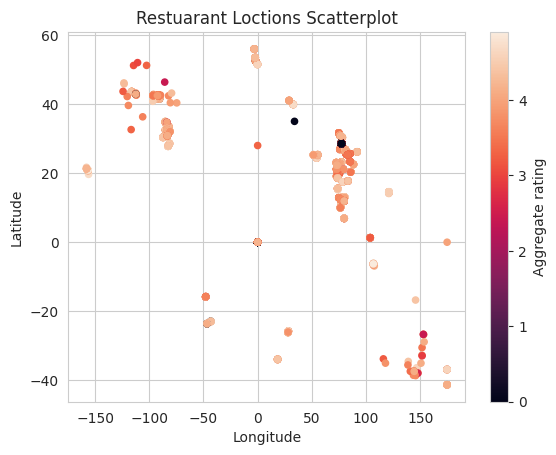

In [19]:
#Scatterplot

df.plot(x='Longitude', y='Latitude',c='Aggregate rating',kind='scatter')
plt.title('Restuarant Loctions Scatterplot')
plt.show()



In [20]:
#Plotly

fig = px.scatter_mapbox(df,
                        lon='Longitude',
                        lat='Latitude',
                        zoom = 2,
                        color ='Aggregate rating',
                        width = 1200,
                        height = 900,
                        title= ('Global Restaurants Location with Rating')
                        )
fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(margin = {'r':0, 't':50, 'l':0, 'b':10})
fig.show()

**Observation**
- The map was first plotted using the scatterplot to show a simple visualization of each restuarant location by correlating with the Aggregate rating.
- The map was also plotted using the plotly function to show a more detailed and interactive map by taking the Longitude, Latitude and the Aggregate rating columns as parameters. And it displays each restaurants location scattered around the map represented with their ratings.
- It can seen from the map that the restaurants are located all over the world.

####**ADDITIONAL ANALYSIS**

- Identify outliers and their effects.
- Determine relationship between votes and ratings.

####**Identify outliers and their effects.**

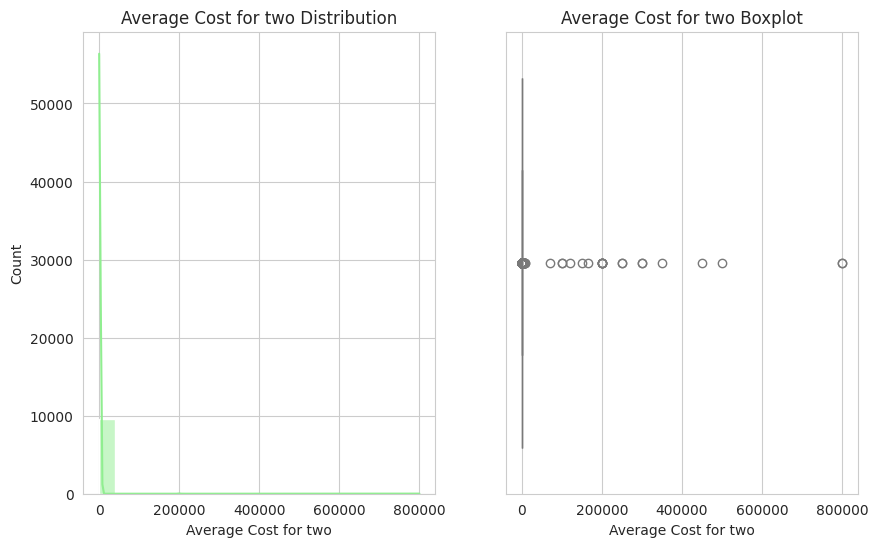

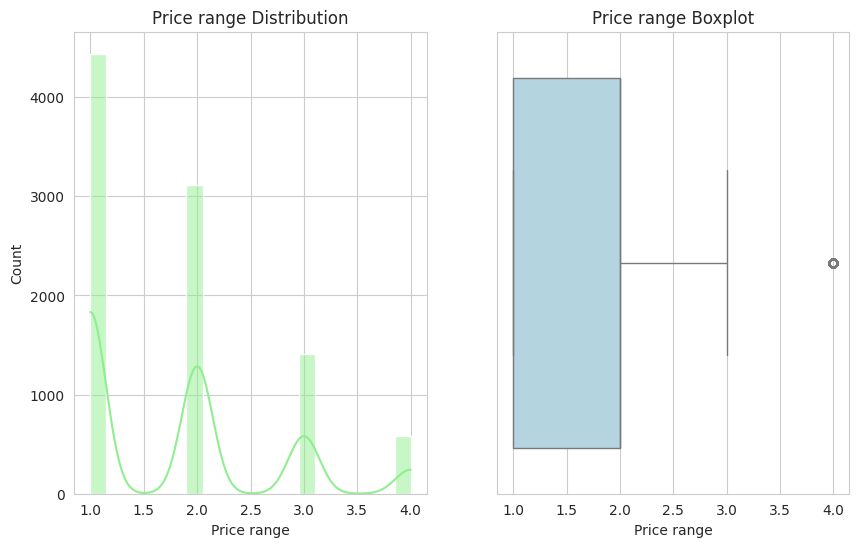

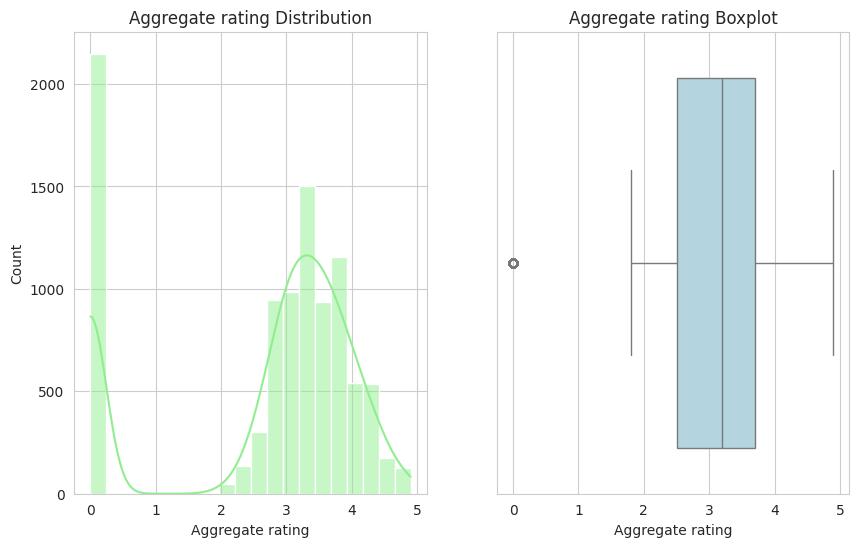

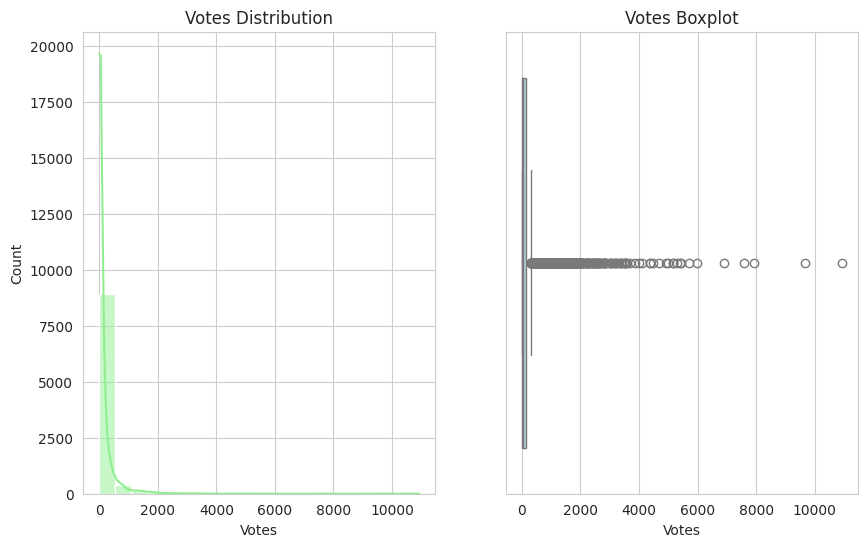

In [21]:
#Get the numerical columns

num_col = ['Average Cost for two','Price range','Aggregate rating','Votes']

#Check for outliers using both histplot and boxplot

#histogram
for col in num_col:
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(df[col], kde=True, bins=20,color='lightgreen')
  plt.title(f'{col} Distribution')
  plt.xlabel(col)

  #Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x= df[col], data=df, color='lightblue')
  plt.title(f'{col} Boxplot')
  plt.xlabel(col)

plt.show()


**Observation**
- Skewness and Outliers can be seen throughtout the histplot and boxplot respectively.
- The Average cost for two,Price range and Votes plot each shows a positively skewed distribution,they all display outliers also in their individual boxplots.
- The Aggregate rating plot shows a negatively skewed distribution and it shows only one particular outlier in the boxplots.
- It can be resolved either by performing the Log or Sqrt transformation on the affected columns, as it would be necessary when preparing data for model training.

####**Determine relationship between votes and ratings.**

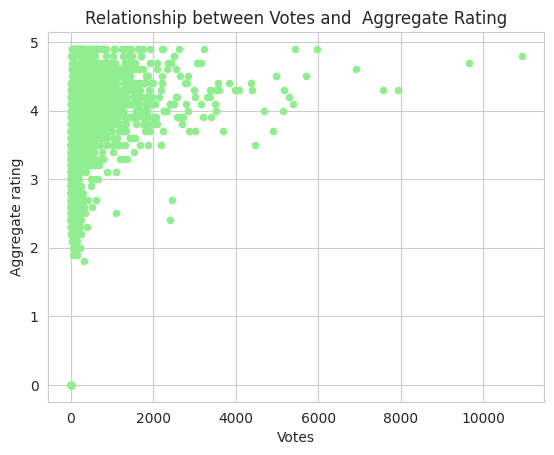

In [22]:
#Show relationship between the Votes and Aggregate rating using Scatterplot

df.plot(x='Votes', y='Aggregate rating', kind='scatter', color='lightgreen')
plt.title('Relationship between Votes and  Aggregate Rating')
plt.show()

**Observation**

From the scatterplot:

- It can be noticed that the 0 which is represented as Not rated restuarants has 0 votes also.
- It can be noticed that majority of the Votes is between the 3,4 and 5 Aggregate ratings, while minority falls between the 2 and 3 Aggregate ratings, and lastly no votes between the 0 and 1 Aggregate ratings atall.
- It can be noticed that majority of the Aggregae rating falls between 0 to 2000 votes, while minority of the Aggregate rating falls between 2000 to 4000 votes.
- It can be noticed that some extreme values are present between the 6000 to 10000 which might be indication of possible outliers.

## **WEEK 3 TASK**
- Identify highest-rated cuisines.
- Identify popular cuisines by votes.
- Determine which price ranges receive highest ratings.
- Compare restaurants with and without table booking.


####**CUISINE ANALYSIS**


####**Identify highest-rated cuisines.**

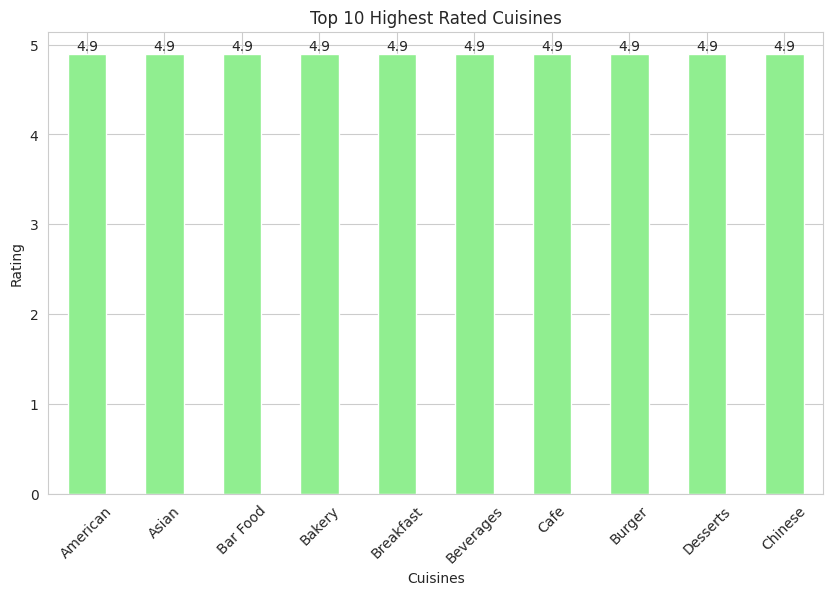

In [23]:
#Identify highest-rated cuisines


plt.figure(figsize=(10,6))
plot = df.groupby('Cuisines')['Aggregate rating'].max().sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars)
plt.title('Top 10 Highest Rated Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

**Observation**
- By using the groupby function to group the cuisines column and getting the Aggregate rating column from it, we can determine which cuisines have the highest ratings by using the max function, which returns the highest rating of each cuisine, as opposed to the mean function, which returns an average rating.

####**Identify popular cuisines by votes.**

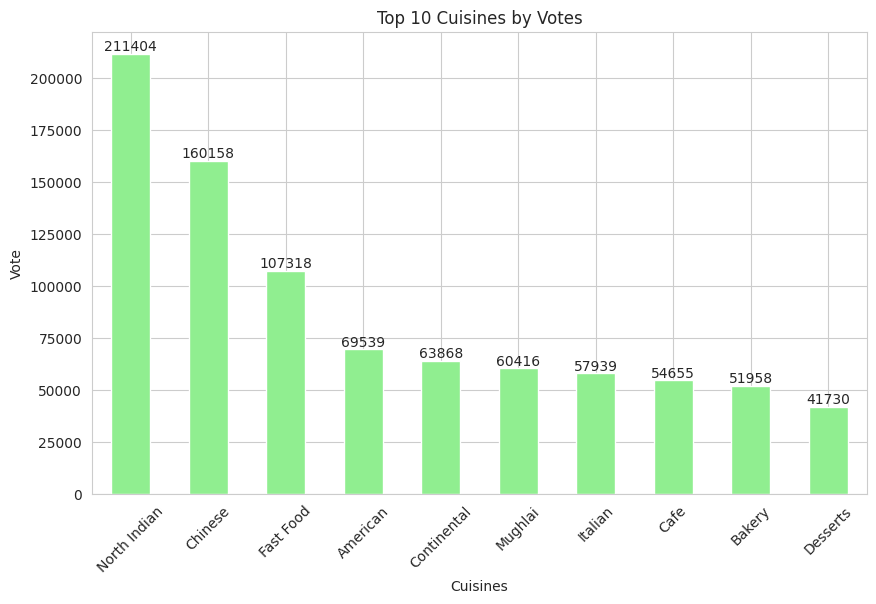

In [24]:
#Identify Popular cuisines by votes


plt.figure(figsize=(10,6))
plot = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False).head(10).plot(kind='bar', color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars)
plt.title('Top 10 Cuisines by Votes')
plt.xlabel('Cuisines')
plt.ylabel('Vote')
plt.xticks(rotation=45)
plt.show()

**Observation**
- As we use the groupby function to group the cuisines column and get the Votes column from it, we can see the Top 10 Cuisines with the most votes by using the max function, which returns the vote for each cuisine.

####**Determine which price ranges receive highest ratings.**

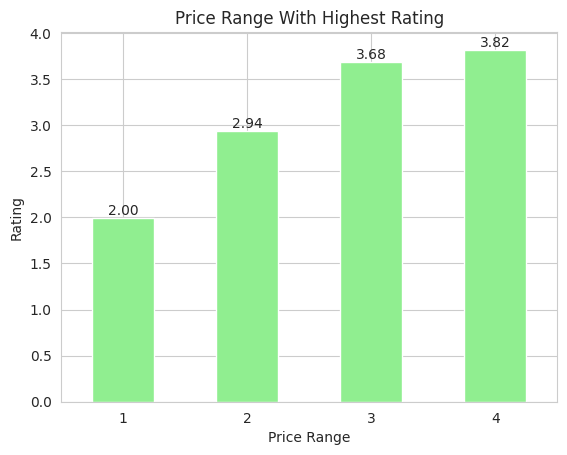

In [25]:
#Price range with highest ratings

plot = df.groupby('Price range')['Aggregate rating'].mean().plot(kind='bar', color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars,  fmt='%.2f')
plt.title('Price Range With Highest Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.xticks(rotation=0)
plt.show()

**Observation**
- As a result of using the groupby function to group the Price range column and getting the Aggregate rating column from it, we can determine the Price range with the highest average rating is 4.

####**Compare restaurants with and without table booking with Aggregate ratings.**

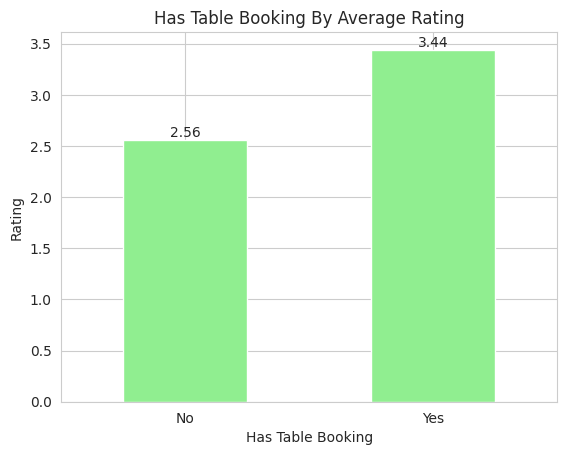

In [26]:
#Compare Restaurants that Has Table booking by ratings

plot = df.groupby('Has Table booking')['Aggregate rating'].mean().plot(kind='bar', color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars,  fmt='%.2f')
plt.title('Has Table Booking By Average Rating')
plt.xlabel('Has Table Booking')
plt.xticks(rotation=0)
plt.ylabel('Rating')
plt.show()

**Observation**
- We can observe the Yes and No of the Has table Booking column, with the Yes bar higher than the No bar, this is gotten by using the mean function to get the average rating of the Aggregate rating column.

####**ADDITIONAL INSIGHTS**
- Determine if table booking availability affects ratings across different cities.
- Compare average ratings with and without this feature.
- Calculate percentage of restaurants offering delivery.
- Analyze the availability of online delivery among restaurants with different price ranges.

### **Table Booking Impact**

####**Determine if table booking availability affects ratings across different cities.**

In [27]:
#Determine if table booking availability affects ratings across different cities.

df.groupby(['Has Table booking', 'City'])['Aggregate rating'].mean()

Has Table booking  City         
No                 Abu Dhabi        4.235714
                   Agra             3.965000
                   Ahmedabad        4.161905
                   Albany           3.552941
                   Allahabad        3.395000
                                      ...   
Yes                Pune             4.153846
                   San Juan City    4.200000
                   Secunderabad     4.500000
                   Tagaytay City    4.500000
                   Taguig City      4.533333
Name: Aggregate rating, Length: 164, dtype: float64

**Observation**
- It can be observed from the results gotten by grouping both the Has Table Booking and City columns together and getting the average rating of the Aggregate rating column that cities with Table Bookings have higher average ratings.

####**Compare average ratings with and without this feature.**

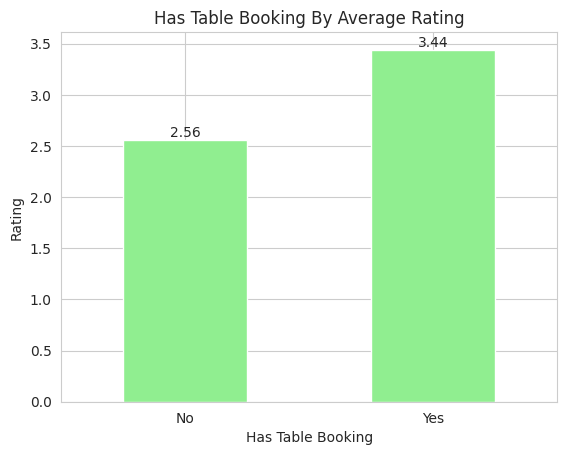

In [28]:
#Compare Restaurants that Has Table booking by ratings

plot = df.groupby('Has Table booking')['Aggregate rating'].mean().plot(kind='bar', color='lightgreen')
for bars in plot.containers:
  plot.bar_label(bars,  fmt='%.2f')
plt.title('Has Table Booking By Average Rating')
plt.xlabel('Has Table Booking')
plt.xticks(rotation=0)
plt.ylabel('Rating')
plt.show()

### **Online Delivery Analysis**

####**Calculate percentage of restaurants offering delivery.**

In [29]:
#percentage of restuarants offering online delivery

restuarant_delivery = round((len(df[df['Has Online delivery'] == 'Yes'])/len(df['Has Online delivery']))*100,2)

print(f'The percentage of restuarants offering Online Delivery is : {restuarant_delivery}%')

The percentage of restuarants offering Online Delivery is : 25.69%


**Observation**
- The result indicates that 25.69% of restaurants provide online delivery. The percentage is calculated by dividing the number of restaurants with online delivery that are Yes by the number of restaurants with online delivery both Yes and No in our dataset, multiplying that number by 100, and finally rounding off the percentage to just 2 decimal places using the round function.

####**Analyze availability across different price ranges.**

In [30]:
#Analyze the availability of online delivery among restaurants with different price ranges.


df.groupby('Has Online delivery')['Price range'].value_counts()

Has Online delivery  Price range
No                   1              3737
                     2              1827
                     3               994
                     4               533
Yes                  2              1286
                     1               701
                     3               411
                     4                53
Name: count, dtype: int64

**Observation**
- From the analysis gotten, we can see that the price range 1 is the most frequent in the Has Online Delivery(NO) column, followed by the 2 and 3, while the 4 is the lowest.
- In the Has Online Delivery(YES) column the price range 2 is the most frequent, followed by 1 and 3 while the 4 is also the lowest.

## **WEEK 4 TASK**
- Feature Engineering [Encoding categorical Columns].
- Handling of Skewness.
- Data Preparation and Model Training.
- Key Insights.
- Save Model.


####**Feature Engineering [Encoding categorical Columns].**

In [31]:
#Encoding the categorical columns

df['Has Table booking'] = pd.get_dummies(df['Has Table booking'], drop_first=True, dtype=float)
df['Has Online delivery'] = pd.get_dummies(df['Has Online delivery'], drop_first=True, dtype=float)
df['Is delivering now'] = pd.get_dummies(df['Is delivering now'], drop_first=True, dtype=float)

df.head(5)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,Botswana Pula(P),1.0,0.0,0.0,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1.0,0.0,0.0,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Desserts,...,Botswana Pula(P),1.0,0.0,0.0,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,Japanese,...,Botswana Pula(P),0.0,0.0,0.0,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,Seafood,...,Botswana Pula(P),1.0,0.0,0.0,No,4,4.8,Dark Green,Excellent,229


**Observation**
- The following columns [Has Table booking,Is delivering now,Has Online delivery] were converted to 1 and 0 float categories using the pd.get_dummies so it can be used in our model training, the first was dropped this is done to prevent data leakage.
- 1 is yes, 0 is No

####**Handling of Skewness**

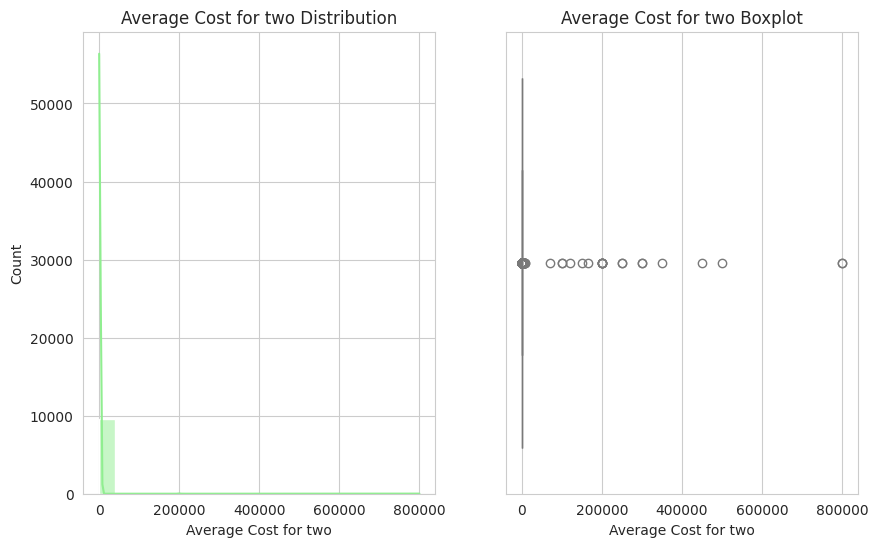

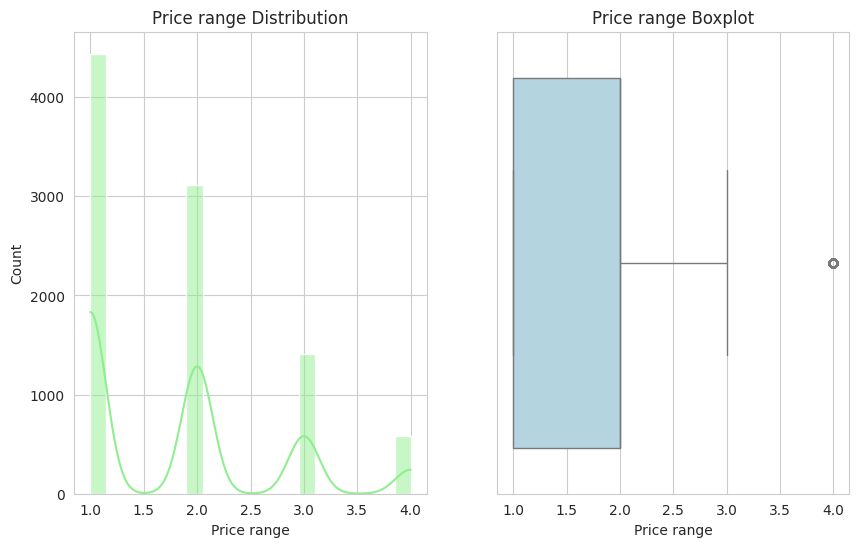

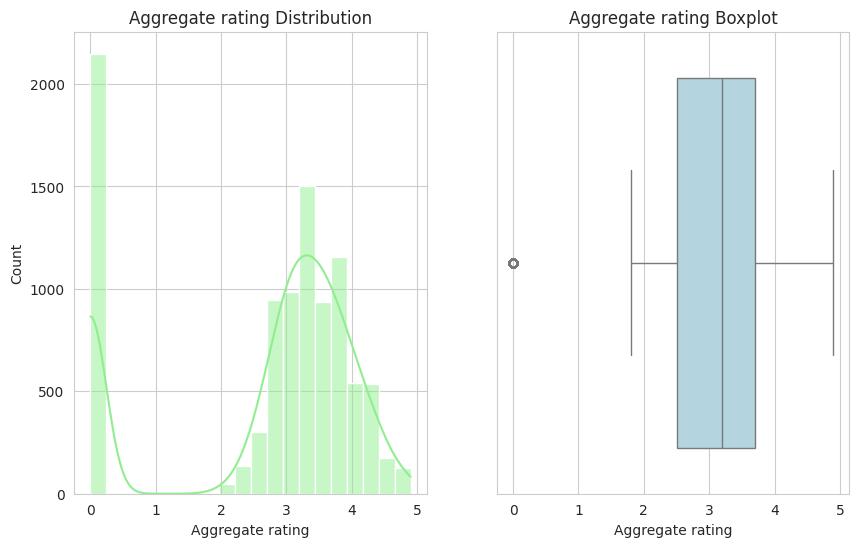

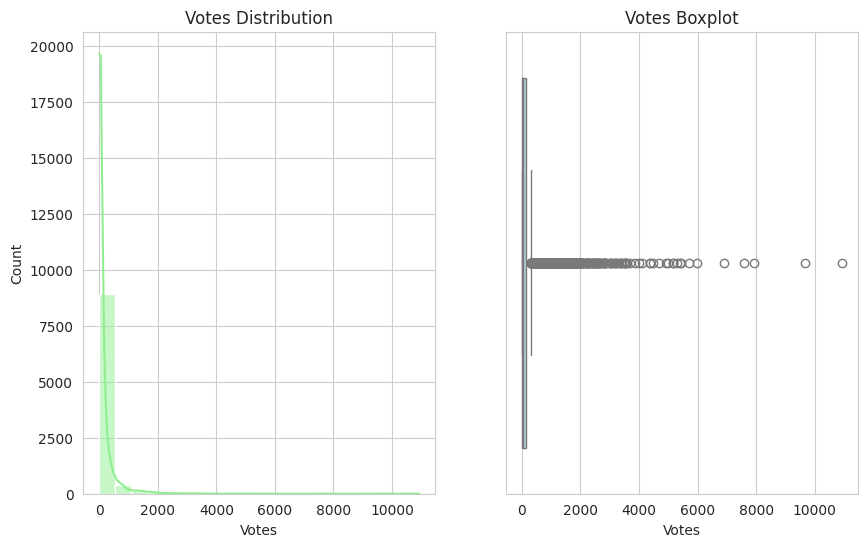

In [32]:
#Get the numerical columns

num_col = ['Average Cost for two','Price range','Aggregate rating','Votes']

#Check for skewness using both histplot and boxplot

#histogram
for col in num_col:
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(df[col], kde=True, bins=20,color='lightgreen')
  plt.title(f'{col} Distribution')
  plt.xlabel(col)

  #Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x= df[col], data=df, color='lightblue')
  plt.title(f'{col} Boxplot')
  plt.xlabel(col)

plt.show()


**Observation**

- We can notice skewness in the above plots, this will be treated by using both the sqrt and log transformations, compare and choose the one that significantly reduces the skewness.

In [33]:
#Using the sqrt transformation

df['sqrt_Average_Cost_for_two'] = np.sqrt(df['Average Cost for two'])
df['sqrt_votes'] = np.sqrt(df['Votes'])
df['sqrt_Aggregate_rating'] = np.sqrt(df['Aggregate rating'])

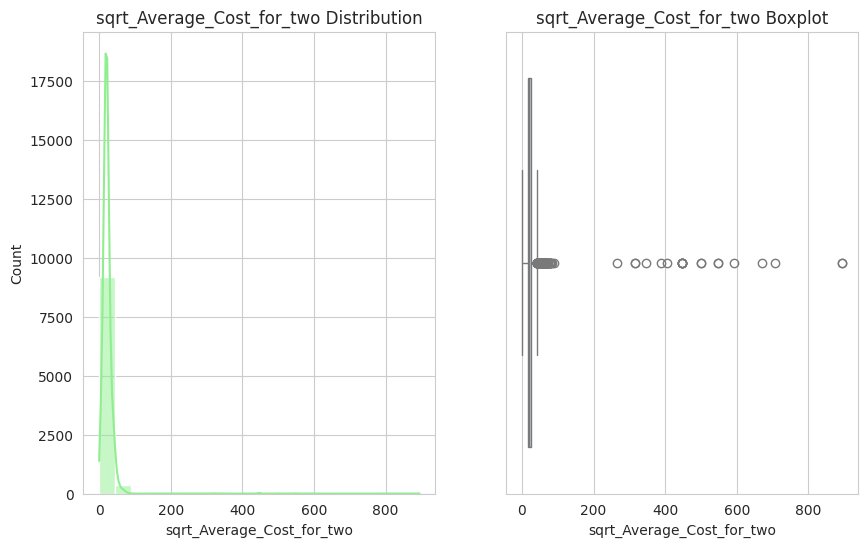

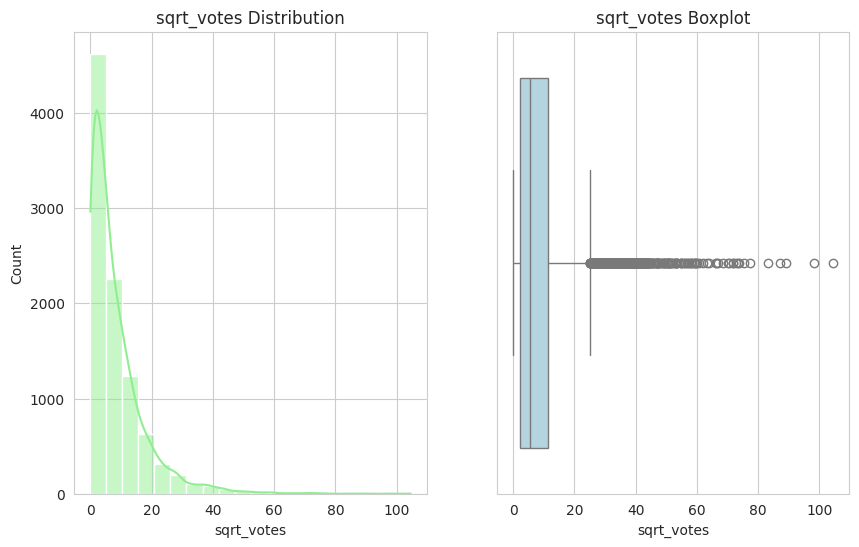

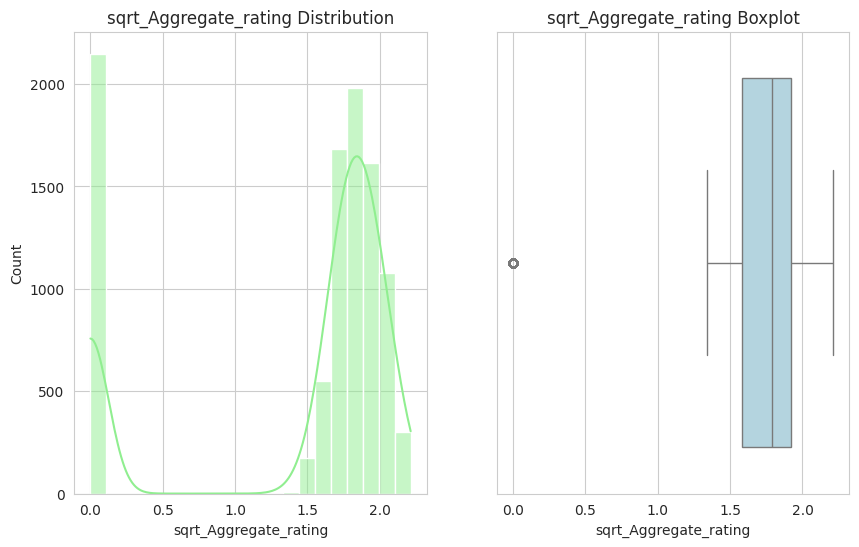

In [34]:
#Visualize the sqrt transformation using histplot and boxplot

#Get the transformed column

num_coll = ['sqrt_Average_Cost_for_two','sqrt_votes','sqrt_Aggregate_rating']

#Check for skewness using both histplot and boxplot

#histogram
for col in num_coll:
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(df[col], kde=True, bins=20,color='lightgreen')
  plt.title(f'{col} Distribution')
  plt.xlabel(col)

  #Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x= df[col], data=df, color='lightblue')
  plt.title(f'{col} Boxplot')
  plt.xlabel(col)

plt.show()


In [35]:
#Using the log1p transformation

df['log1p_Average_Cost_for_two'] = np.log1p(df['Average Cost for two'])
df['log1p_votes'] = np.log1p(df['Votes'])
df['log1p_Aggregate_rating'] = np.log1p(df['Aggregate rating'])

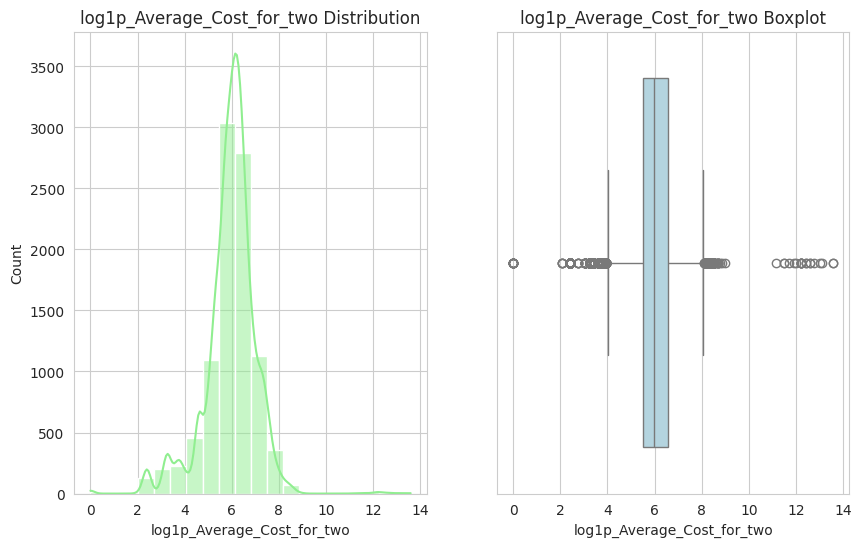

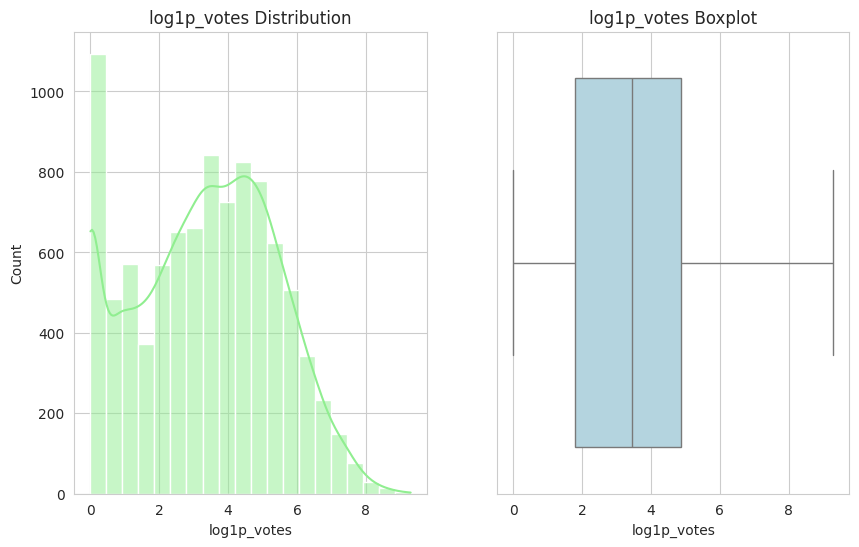

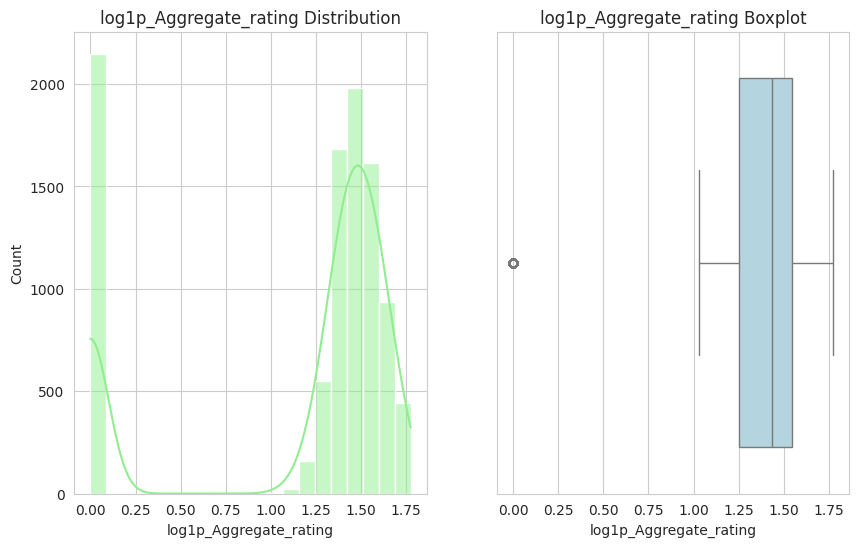

In [36]:
#Visualize the log1p transformation using histplot and boxplot

#Get the transformed column

num_colll = ['log1p_Average_Cost_for_two','log1p_votes','log1p_Aggregate_rating']

#Check for skewness using both histplot and boxplot

#histogram
for col in num_colll:
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(df[col], kde=True, bins=20,color='lightgreen')
  plt.title(f'{col} Distribution')
  plt.xlabel(col)

  #Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x= df[col], data=df, color='lightblue')
  plt.title(f'{col} Boxplot')
  plt.xlabel(col)

plt.show()


**Observation**
- After using the sqrt and log1p tranformations, it can be noticed from the visualizations that the log1p performed better on the Votes and Average cost for two columns.
- The log1p was used instead of the regular log because it helps in treating zero values in the dataset.
- Only the log1p_votes and log1p_Average_cost_for_two would be used in our model training.
- There is no significant change in the Aggregate rating after using both the sqrt and log1p transformations, so we would just make use of the normal Aggregate column.
- The Price range was not transformed atall because there were no significant outliers being visualized.

####**Data Preparation.**

In [37]:
#Check the dataset
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Aggregate rating,Rating color,Rating text,Votes,sqrt_Average_Cost_for_two,sqrt_votes,sqrt_Aggregate_rating,log1p_Average_Cost_for_two,log1p_votes,log1p_Aggregate_rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,French,...,4.8,Dark Green,Excellent,314,33.166248,17.720045,2.190890,7.003974,5.752573,1.757858
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,4.5,Dark Green,Excellent,591,34.641016,24.310492,2.121320,7.090910,6.383507,1.704748
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,Desserts,...,4.4,Green,Very Good,270,63.245553,16.431677,2.097618,8.294300,5.602119,1.686399
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,Japanese,...,4.9,Dark Green,Excellent,365,38.729833,19.104973,2.213594,7.313887,5.902633,1.774952
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,Seafood,...,4.8,Dark Green,Excellent,229,38.729833,15.132746,2.190890,7.313887,5.438079,1.757858


In [38]:
#Split into X[Features] and y[Target variable]

X = df.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
             'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines','Currency','Switch to order menu',
             'Average Cost for two','sqrt_Average_Cost_for_two','Votes','Rating color', 'Rating text',
             'sqrt_votes', 'sqrt_Aggregate_rating','log1p_Aggregate_rating','Aggregate rating'], axis=1)
y = df['Aggregate rating']

In [39]:
X

,Has Table booking,Has Online delivery,Is delivering now,Price range,log1p_Average_Cost_for_two,log1p_votes
0,1.0,0.0,0.0,3,7.003974,5.752573
1,1.0,0.0,0.0,3,7.090910,6.383507
2,1.0,0.0,0.0,4,8.294300,5.602119
3,0.0,0.0,0.0,4,7.313887,5.902633
4,1.0,0.0,0.0,4,7.313887,5.438079
...,...,...,...,...,...,...
9546,0.0,0.0,0.0,3,4.394449,6.670766
9547,0.0,0.0,0.0,3,4.663439,6.942157
9548,0.0,0.0,0.0,4,5.141664,6.495266
9549,0.0,0.0,0.0,4,4.795791,6.804615


In [40]:
y

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8
...,...
9546,4.1
9547,4.2
9548,3.7
9549,4.0


In [41]:
#split the data into train and test

#import reqired library
from sklearn.model_selection import train_test_split,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Observation**
- The dataset was split into Features [X] and Target[y] variable
- It was then splitted into our Train and Test splits using TestTrainSplit.
- The dataset was splitted into 80% train data and 20% test data.

####**Model Selection**

- The Linear Regression, The DecisionTreeRegression and The RandomForestRegression would be used on the dataset, and the best performing model would be saved as our model for prediction

In [42]:
#build the linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

#predict the train and test data
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [43]:
#Evaluating the metrics of the Linear regression model

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score


#the mean square error for the Train and Test data

lr_train_mse = mean_squared_error(y_train,train_pred)
print(f'Training MSE: {lr_train_mse}')
print('\n')
lr_test_mse = mean_squared_error(y_test,test_pred)
print(f'Test MSE: {lr_test_mse} ')
print('\n')


#the root mean square error for the Train and Test data

lr_train_rmse = root_mean_squared_error(y_train,train_pred)
print(f'Training RMSE: {lr_train_rmse}')
print('\n')
lr_test_rmse = root_mean_squared_error(y_test,test_pred)
print(f'Test RMSE: {lr_test_rmse} ')
print('\n')


#the r2 score of the Train and Test data

lr_train_score = r2_score(y_train,train_pred)
print(f'Training SCORE: {lr_train_score}')
print('\n')
lr_test_score = r2_score(y_test,test_pred)
print(f'Test SCORE: {lr_test_score} ')
print('\n')

Training MSE: 0.6387975061881729


Test MSE: 0.6360581133977781 


Training RMSE: 0.7992480880103329


Test RMSE: 0.797532515573991 


Training SCORE: 0.7225277903282395


Test SCORE: 0.7222492709572614 




**Observation**

The results gotten from the Linear Regression model suggests that the model might not be capturing the data's complexity well.
MSE (Mean Squared Error)
- Training MSE: 0.6387
- Test MSE: 0.6360
- MSE is nearly the same for training and test sets, indicating no overfitting.
- Lower MSE means the model's predictions are relatively close to actual values

RMSE (Root Mean Squared Error)
- Training RMSE: 0.7992
- Test RMSE: 0.7975
- RMSE is lower than the standard deviation, meaning the model improves upon a naive prediction (e.g., using the mean).

R² Score
- Training R²: 0.7225
- Test R²: 0.7222
- A low R² (~0.72) means that the model explains 72% of the variance in the target variable.

The small gap between training and test R² suggests that the model generalizes well to unseen data.




In [44]:
#Build Decision Tree Model

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
#Define the parameter grid
param_gr = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}


#model

dtree = DecisionTreeRegressor()

#Grid search

grid_search = GridSearchCV(estimator=dtree, param_grid=param_gr, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]})

In [45]:
#best estimator
best_gri= grid_search.best_estimator_

#Predict the train and test using the best estimator
d_train_pred = best_gri.predict(X_train)
d_test_pred = best_gri.predict(X_test)

In [46]:
#Evaluating the metrics of the Decision Tree regression model

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score


#the mean square error for the Train and Test data

d_train_mse = mean_squared_error(y_train,d_train_pred)
print(f'Training MSE: {d_train_mse}')
print('\n')
d_test_mse = mean_squared_error(y_test,d_test_pred)
print(f'Test MSE: {d_test_mse} ')
print('\n')


#the root mean square error for the Train and Test data

d_train_rmse = root_mean_squared_error(y_train,d_train_pred)
print(f'Training RMSE: {d_train_rmse}')
print('\n')
d_test_rmse = root_mean_squared_error(y_test,d_test_pred)
print(f'Test RMSE: {d_test_rmse} ')
print('\n')


#the r2 score of the Train and Test data

d_train_score = r2_score(y_train,d_train_pred)
print(f'Training SCORE: {d_train_score}')
print('\n')
d_test_score = r2_score(y_test,d_test_pred)
print(f'Test SCORE: {d_test_score} ')
print('\n')

Training MSE: 0.09720034928562282


Test MSE: 0.1265090432569965 


Training RMSE: 0.3117697055289735


Test RMSE: 0.35568109769426387 


Training SCORE: 0.9577794286360224


Test SCORE: 0.9447566531186506 




**Observation**

Decision Tree Regression results show a significant improvement over Linear Regression!

MSE (Mean Squared Error)
- Training MSE: 0.0972
- Test MSE: 0.1265
- Drastic improvement from previous MSE of 0.638 (Linear Regression).
- Slightly Higher Test Error than Training

RMSE (Root Mean Squared Error)
- Training RMSE: 0.3117
- Test RMSE: 0.3556
- Huge improvement from previous RMSE of 0.7992.
- RMSE is way lower than the standard deviation, meaning much better predictions.
- The average error in prediction is small.
- Train-test RMSE are nearly identical, indicating excellent generalization.
- Predictions are more accurate than before.

R² Score (Model Fit)
- Training R²: 0.9577
- Test R²: 0.9447
- The model ~94% of variance captures almost all the variance in the target variable.
- It is performing much better than Linear Regression (which had ~0.72 R²).


- Decision Tree is clearly outperforming Linear Regression (MSE, RMSE, and R² all improved).
- No overfitting, as train and test R² are nearly equal.
- A better model than the Linear Regression model





In [47]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'n_estimators':[2,5,10]
}

#model

forest = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest, param_grid, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, None],
                         'n_estimators': [2, 5, 10]})

In [48]:
#best estimator
best_grid= grid_search.best_estimator_

#Predict the train and test using the best estimator
r_train_pred = best_grid.predict(X_train)
r_test_pred = best_grid.predict(X_test)

In [49]:
#Evaluating the metrics of the Random Forest regression model

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score


#the mean square error for the Train and Test data

r_train_mse = mean_squared_error(y_train,r_train_pred)
print(f'Training MSE: {r_train_mse}')
print('\n')
r_test_mse = mean_squared_error(y_test,r_test_pred)
print(f'Test MSE: {r_test_mse} ')
print('\n')


#the root mean square error for the Train and Test data

r_train_rmse = root_mean_squared_error(y_train,r_train_pred)
print(f'Training RMSE: {r_train_rmse}')
print('\n')
r_test_rmse = root_mean_squared_error(y_test,r_test_pred)
print(f'Test RMSE: {r_test_rmse} ')
print('\n')


#the r2 score of the Train and Test data

r_train_score = r2_score(y_train,r_train_pred)
print(f'Training SCORE: {r_train_score}')
print('\n')
r_test_score = r2_score(y_test,r_test_pred)
print(f'Test SCORE: {r_test_score} ')
print('\n')

Training MSE: 0.08600751284842134


Test MSE: 0.1142196278739341 


Training RMSE: 0.2932703749928065


Test RMSE: 0.33796394463601304 


Training SCORE: 0.9626412213459802


Test SCORE: 0.9501231345929935 




**Observation**

Random Forest Regression model has shown significant improvements compared to Decision Tree and Linear Regression.

MSE (Mean Squared Error)
- Training MSE: 0.0860
- Test MSE:  0.1142
- Test MSE decreased from  0.6360 →  0.1265 →  0.1142, meaning Random Forest generalizes better than Decision Tree and the Linear Regression.

RMSE (Root Mean Squared Error)
- Training RMSE: 0.304
- Test RMSE: 0.328
- Test RMSE dropped from0.7975 → 0.3556 →  0.3379, meaning Random Forest reduces error significantly.
- Training RMSE also improved, making the model more precise.
- Prediction errors are small, generalizing well.

R² Score (Model Fit)
- Training R²: 0.9626
- Test R²:  0.9501
- Training R² increased from 0.7222 → 0.9447 →  0.9626, meaning Random Forest captures more variance.
- Test Score (0.9501) is close to Training Score (0.9626). This means no signs of overfitting, which is great.
- The model explains ~95% of the variance. Excellent fit.

### **KEY INSIGHTS**

- Random Forest outperformed Decision Tree and Linear Regression in every  metric (lower RMSE, lower MSE, higher R²).
- No signs of overfitting, as the train-test scores are close.
- Better generalization, since test performance improved significantly.
- Random Forest is the best performing model so far


### **SAVE MODEL**

- The Random forest regressor model would be saved as it is the best performing model.

In [50]:
#import required library

import pickle
filename = 'model.sav'
pickle.dump(best_grid, open(filename, 'wb'))

